# Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr
from sklearn.datasets import fetch_california_housing

In [2]:
%matplotlib inline

In [3]:
california = fetch_california_housing()

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, skiprows=22, header=None, sep="\\s+")
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                 'B', 'LSTAT']

In [6]:
boston = pd.DataFrame(data=data, columns=feature_names)
boston['target'] = target

In [7]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### SSE

In [8]:
mean_expected_value = boston['target'].mean()

In [9]:
squared_errors = pd.Series(boston['target'] - mean_expected_value)**2
SSE = np.sum(squared_errors)
print(f'SSE = {SSE:.2f}')

SSE = 42716.30


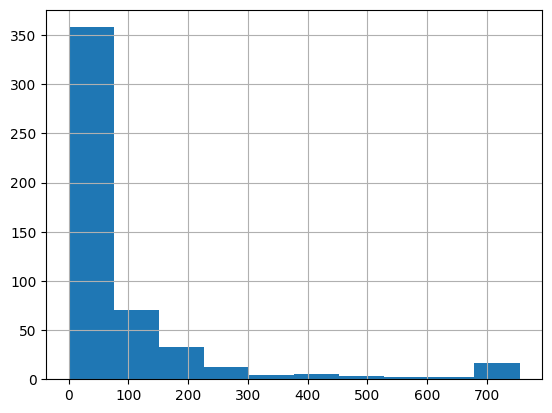

In [10]:
squared_errors.hist();

### Коэффициент корреляции

In [11]:
print(f"Коэффициент корреляции {pearsonr(boston['RM'], boston['target'])[0]:.5}")

Коэффициент корреляции 0.69536


### Диаграмма рассеяния

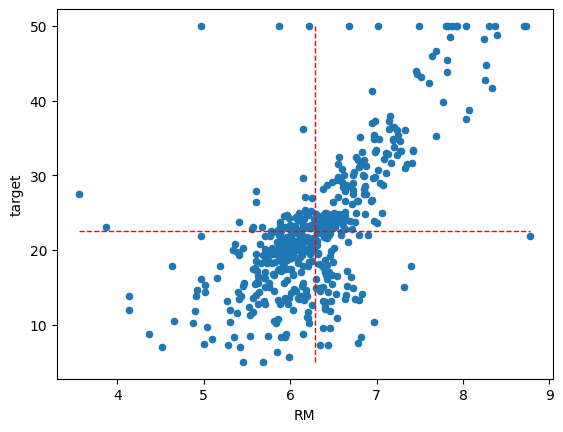

In [12]:
x_range = [boston['RM'].min(), boston['RM'].max()]
y_range = [boston['target'].min(), boston['target'].max()]
sc = boston.plot(kind='scatter', x='RM', y='target')
mean_Y = sc.plot(x_range, [boston['target'].mean(), boston['target'].mean()], '--', color='red', linewidth=1)
mean_X = sc.plot([boston['RM'].mean(), boston['RM'].mean()], y_range, '--', color='red', linewidth=1);

### Регрессия

* OLS

In [13]:
y = boston['target']
X = boston['RM']
X = sm.add_constant(X)

In [14]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [15]:
linear_regression = sm.OLS(y, X)

In [16]:
fitted_model = linear_regression.fit()

In [17]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.49e-74
Time:                        22:36:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(fitted_model.params)

const   -34.670621
RM        9.102109
dtype: float64


In [19]:
betas = np.array(fitted_model.params)
print(betas)

[-34.67062078   9.10210898]


* LinearRegression

Работает быстрее, чем OLS

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
observation = len(boston)
X = boston['RM'].values.reshape((observation, 1))
y = boston['target'].values

In [22]:
lin_reg.fit(X, y)

LinearRegression()

In [23]:
print(lin_reg.intercept_, lin_reg.coef_)

-34.67062077643857 [9.10210898]


### Прогноз

* predict

In [24]:
RM = 5
Xp = np.array([1, RM])
print(f"Прогноз {fitted_model.predict(Xp)}")

Прогноз [10.83992413]


In [25]:
fitted_values = lin_reg.predict(X)
print(fitted_values)

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

* dot

In [26]:
# predict_by_dot = np.dot(X, betas)
# print(predict_by_dot[:5])

# Мультиколенеарность

In [27]:
observation = len(boston)
variables = boston.columns[:-1]
X = boston.iloc[:, :-1]
y = boston['target'].values

In [28]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y, Xc)
fitted_model = linear_regression.fit()

In [29]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        22:36:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Матрица корреляции

In [30]:
corr_matrix = X.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [31]:
def visualize_corr_matrix(data, hurdle=0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(
        axis='both',
        which='both',
        bottom='off',
        top='off',
        left='off',
        right='off',
    )
    plt.colorbar()
    plt.show()


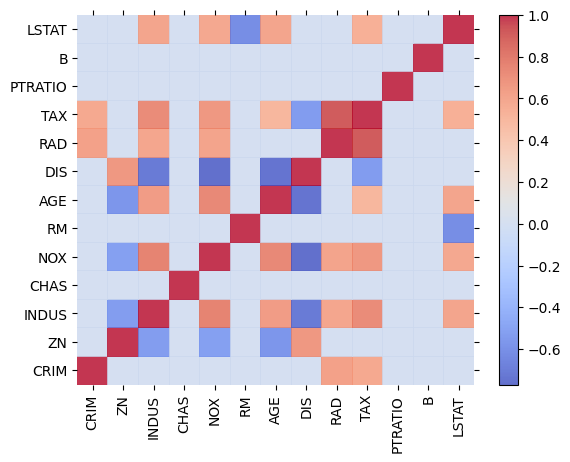

In [32]:
visualize_corr_matrix(X, hurdle=0.5)

### Масштабирование

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
variables = boston.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_std = standardization.scale_
Xst = np.column_stack((Xst, np.ones(observation)))
y = boston['target'].values

### Стандартизированные коэффициенты

In [35]:
from sklearn.pipeline import make_pipeline 

In [36]:
X = boston.iloc[:, :-1]
lin_reg = LinearRegression()
standartization = StandardScaler()
stand_coef_linear_reg = make_pipeline(standartization, lin_reg)

* коэффициенты без стандартизации. NOX стягивает на себя все внимание

In [37]:
lin_reg.fit(X, y)

for coef, var in sorted(zip(map(abs, lin_reg.coef_), boston.columns[:-1]), reverse=True):
    print(f'{coef:.3f} - {var}')

17.767 - NOX
3.810 - RM
2.687 - CHAS
1.476 - DIS
0.953 - PTRATIO
0.525 - LSTAT
0.306 - RAD
0.108 - CRIM
0.046 - ZN
0.021 - INDUS
0.012 - TAX
0.009 - B
0.001 - AGE


* стандартизированные коэффициенты

Шкала указывает наиболее важные переменные.

In [38]:
stand_coef_linear_reg.fit(X, y)

for coef, var in sorted(zip(map(abs, stand_coef_linear_reg.steps[1][1].coef_), boston.columns[:-1]), reverse=True):
    print(f'{coef:.3f} - {var}')

3.744 - LSTAT
3.104 - DIS
2.674 - RM
2.662 - RAD
2.077 - TAX
2.061 - PTRATIO
2.057 - NOX
1.082 - ZN
0.928 - CRIM
0.849 - B
0.682 - CHAS
0.141 - INDUS
0.019 - AGE


### Сравнение по R2

In [39]:
from sklearn.metrics import r2_score

In [40]:
lin_reg = LinearRegression()

In [41]:
def r2_est(X, y):
    return r2_score(y, lin_reg.fit(X, y).predict(X))

In [42]:
print(f'R2: {r2_est(X, y):.3f}')

R2: 0.741


#### Частичный R2

Представление о том, какие переменные вносят больший вклад в ошибку модели.
Частичные R2 не являются разложением исходной меры R2. Это связано с коллинеарностью переменных.

In [43]:
r2_impact = list()

for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X, y) - r2_est(X.values[:, selection], y)), boston.columns[j]))

for imp, varname in sorted(r2_impact, reverse=True):
                     print("%6.3f %s" %(imp, varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


### PolynomialFeatures

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [72]:
baseline = r2_est(X, y)
print(f'R2: {baseline:.3f}')

R2: 0.741


In [64]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_features_in_

RM очень сильно взаимодействует с другими переменными, особенно с LSTAT

In [104]:
for k, effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[np.where(effect==1)[0]]
    increment= r2_est(Xi[:, list(range(0, main_effects)) + [main_effects + k]], y) - baseline
    if increment > 0.01:
        print(f'{termA:8} * {termB:8}: R2 = {increment:5.3f}')

CRIM     * CHAS    : R2 = 0.011
CRIM     * RM      : R2 = 0.021
ZN       * RM      : R2 = 0.013
INDUS    * RM      : R2 = 0.038
INDUS    * DIS     : R2 = 0.013
NOX      * RM      : R2 = 0.027
RM       * AGE     : R2 = 0.024
RM       * DIS     : R2 = 0.018
RM       * RAD     : R2 = 0.049
RM       * TAX     : R2 = 0.054
RM       * PTRATIO : R2 = 0.041
RM       * B       : R2 = 0.020
RM       * LSTAT   : R2 = 0.064


Добавим к матрице произведение RM и LSTAT. И пересчитаем R2

In [109]:
Xi = X
Xi['interaction'] = X['RM'] * X['LSTAT']
print(f'R2 with RM*LSTAT: {r2_est(Xi, y):.3f}' )

R2 with RM*LSTAT: 0.805


### Polynomial Regression

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_regression = LinearRegression()
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

linear_predictor = make_pipeline(linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)

Первая подгонка. Простая линейная регрессия. Прямая плохо проходит облако точек.

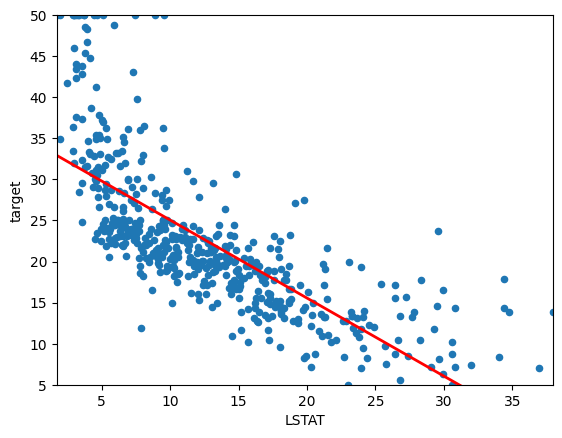

In [114]:
predictor = 'LSTAT'
x = boston[predictor].values.reshape((observation, 1))
xt = np.arange(0, 50, 0.1).reshape((np.int8(50/0.1), 1))
x_range = [boston[predictor].min(), boston[predictor].max()]
y_range = [boston['target'].min(), boston['target'].max()]

scatter = boston.plot(kind='scatter', x=predictor, y='target',
                       xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt),
                         '-', color='red', linewidth=2)

Линия регрессии задана квадратичной функцией.

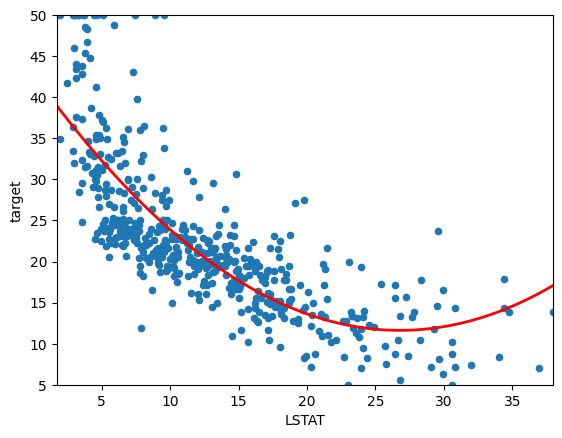

In [118]:
scatter = boston.plot(kind='scatter', x=predictor, y='target', 
                         xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, quadratic_predictor.fit(x,y).predict(xt), 
                         '-', color='red', linewidth=2)

Линия регрессии задана кубической функцией. Здесь лучшее соответствие.

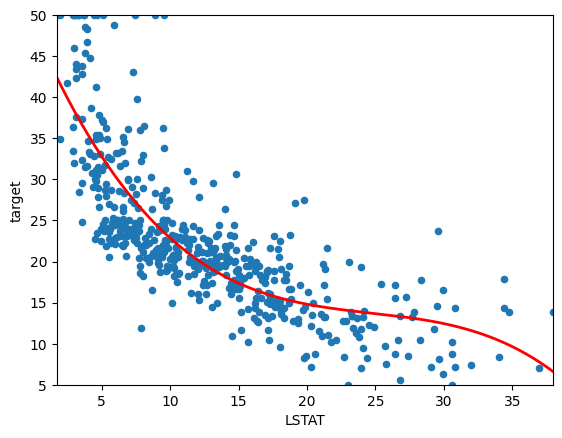

In [116]:
scatter = boston.plot(kind='scatter', x=predictor, y='target', 
                         xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), 
                         '-', color='red', linewidth=2)

#### Более высокая степень

In [123]:
for d in [1, 2, 3, 4, 5, 15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x, y)
    print(f'R2 degree - {d:2}, polynomial = {r2_score(y, model.predict(x)):.3f}')

R2 degree -  1, polynomial = 0.544
R2 degree -  2, polynomial = 0.641
R2 degree -  3, polynomial = 0.658
R2 degree -  4, polynomial = 0.673
R2 degree -  5, polynomial = 0.682
R2 degree - 15, polynomial = 0.695


Существует большая разница в коэф-те детерминации между линейной моделью и квадратичным разложением (с 0,544 до 0,641). При 15-ой степени, коэф-т самый большой, но график имеет не столь гладкую подгонку. Кривая имеет тенденцию строго следовать распределению точек, становясь беспорядочной, когда плотность уменьшается на границах диапазона значений.

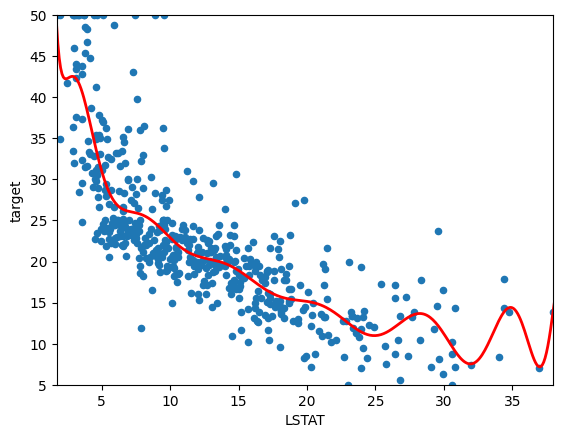

In [125]:
scatter = boston.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)